In [1]:
#importing all the required libraries and setting required options

import pandas as pd
import numpy as np
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
import xgboost as xgb
from sklearn.model_selection import GridSearchCV
import statsmodels.api as sm
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc("font", size=14)
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)
pd.set_option('display.max_columns', None)

In [2]:
data = pd.read_csv("banking.csv", header=0)

In [3]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
0,44,blue-collar,married,basic.4y,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0
4,55,retired,married,basic.4y,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1


In [4]:
#checking for nan values

data.isna().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

In [5]:
data["contact"].unique()

array(['cellular', 'telephone'], dtype=object)

In [6]:
data["education"].unique()

array(['basic.4y', 'unknown', 'university.degree', 'high.school',
       'basic.9y', 'professional.course', 'basic.6y', 'illiterate'],
      dtype=object)

In [7]:
#binning 'basic.9y','basic.4y','basic.6y' as Basic

data["education"] = np.where(data['education'] == 'basic.9y', 'Basic', data['education'])

data["education"] = np.where(data['education'] == 'basic.4y', 'Basic', data['education'])

data["education"] = np.where(data['education'] == 'basic.6y', 'Basic', data['education'])

In [8]:
data["education"].unique()

array(['Basic', 'unknown', 'university.degree', 'high.school',
       'professional.course', 'illiterate'], dtype=object)

In [9]:
data['y'].value_counts()

0    36548
1     4640
Name: y, dtype: int64

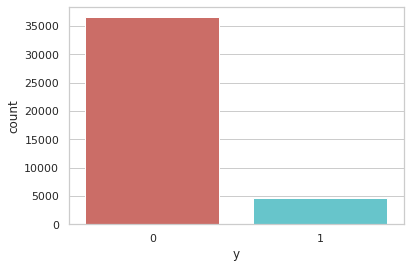

In [10]:
sns.countplot(x='y', data=data, palette='hls')
plt.show()

In [11]:
count_no_sub = len(data[data['y']==0])

In [12]:
count_sub = len(data[data['y']==1])

In [13]:
percentage_no_sub = count_no_sub/(count_no_sub+count_sub)

In [14]:
percentage_sub = count_sub/(count_no_sub+count_sub)

In [15]:
print('Percentage of no subscription is : ', percentage_no_sub * 100)

Percentage of no subscription is :  88.73458288821988


In [16]:
print('Percentage of subscription is :', percentage_sub*100)

Percentage of subscription is : 11.265417111780131


In [17]:
#Data analysis 
#Getting inference between features aand the output

data.groupby('y').mean().style.background_gradient(cmap='PuRd')

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed
y,,,,,,,,,,
0,39.911185,220.844807,2.633085,984.113878,0.132374,0.248875,93.603757,-40.593097,3.811491,5176.166600
1,40.913147,553.191164,2.051724,792.035560,0.492672,-1.233448,93.354386,-39.789784,2.123135,5095.115991


In [18]:
#Data analysis
#relation between month and features
#dec, mar, oct, sep are the important months

data.groupby('month').mean().style.background_gradient(cmap='YlGn')

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
month,,,,,,,,,,,
apr,40.593845,293.200608,1.947188,955.587386,0.323328,-1.800000,93.119558,-46.273632,1.361070,5093.123708,0.204787
aug,41.644221,232.430722,2.666559,961.062156,0.115410,0.747151,93.311065,-35.597184,4.300623,5200.248349,0.106021
dec,47.307692,345.609890,2.159341,748.060440,0.615385,-2.846154,92.715363,-33.708791,0.865319,5031.895604,0.489011
jul,39.035545,273.426122,3.160998,982.700725,0.047115,1.158921,93.894923,-42.370170,4.685678,5214.078575,0.090466
jun,39.766077,242.561301,3.072208,970.221512,0.083114,0.688379,94.245402,-41.579428,4.256908,5197.493193,0.105115
mar,40.778388,245.946886,2.203297,835.454212,0.483516,-1.800000,93.097330,-42.650549,1.162745,5055.390110,0.505495
may,39.031084,261.231752,2.439756,981.120415,0.164209,-0.164972,93.528882,-40.579272,3.293665,5149.521592,0.064347
nov,40.965618,245.855645,1.909290,952.950256,0.293587,-0.418483,93.200943,-41.238747,3.723123,5173.031236,0.101439
oct,44.171309,288.367688,1.545961,781.909471,0.647632,-2.438579,93.175107,-34.580919,1.200123,5018.823816,0.438719


In [19]:
#Data analysis
#relation between job and features

data.groupby('job').mean().style.background_gradient(cmap='BuGn')

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
job,,,,,,,,,,,
admin.,38.187296,254.312128,2.623489,954.319229,0.189023,0.015563,93.534054,-40.245433,3.550274,5164.125350,0.129726
blue-collar,39.555760,264.542360,2.558461,985.160363,0.122542,0.248995,93.656656,-41.375816,3.771996,5175.615150,0.068943
entrepreneur,41.723214,263.267857,2.535714,981.267170,0.138736,0.158723,93.605372,-41.283654,3.791120,5176.313530,0.085165
housemaid,45.500000,250.454717,2.639623,960.579245,0.137736,0.433396,93.676576,-39.495283,4.009645,5179.529623,0.100000
management,42.362859,257.058140,2.476060,962.647059,0.185021,-0.012688,93.522755,-40.489466,3.611316,5166.650513,0.112175
retired,62.027326,273.712209,2.476744,897.936047,0.327326,-0.698314,93.430786,-38.573081,2.770066,5122.262151,0.252326
self-employed,39.949331,264.142153,2.660802,976.621393,0.143561,0.094159,93.559982,-40.488107,3.689376,5170.674384,0.104856
services,37.926430,258.398085,2.587805,979.974049,0.154951,0.175359,93.634659,-41.290048,3.699187,5171.600126,0.081381
student,25.894857,283.683429,2.104000,840.217143,0.524571,-1.408000,93.331613,-40.187543,1.884224,5085.939086,0.314286


In [20]:
#Data analysis
#relation between matital status and features

data.groupby('marital').mean().style.background_gradient(cmap='OrRd')

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y
marital,,,,,,,,,,,
divorced,44.899393,253.790330,2.613400,968.639853,0.168690,0.163985,93.606563,-40.707069,3.715603,5170.878643,0.103209
married,42.307165,257.438623,2.572810,967.247673,0.155608,0.183625,93.597367,-40.270659,3.745832,5171.848772,0.101573
single,33.158714,261.524378,2.533800,949.909578,0.211359,-0.167989,93.517300,-40.918698,3.317447,5155.199265,0.140041
unknown,40.275000,312.725000,3.187500,937.100000,0.275000,-0.221250,93.471250,-40.820000,3.313038,5157.393750,0.150000


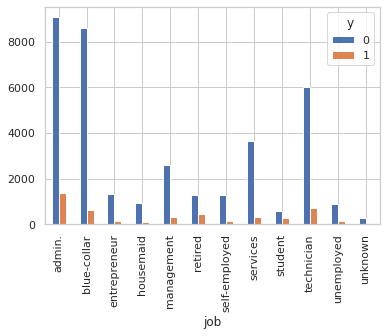

In [21]:
#ppl with admin and techichian job are more likely to opt for insurance

pd.crosstab(data.job, data.y).plot(kind='bar')
plt.show()

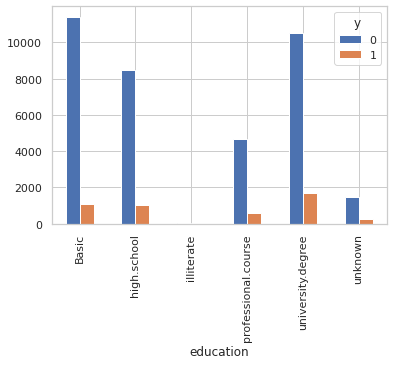

In [22]:
pd.crosstab(data.education, data.y).plot(kind='bar')
plt.show()

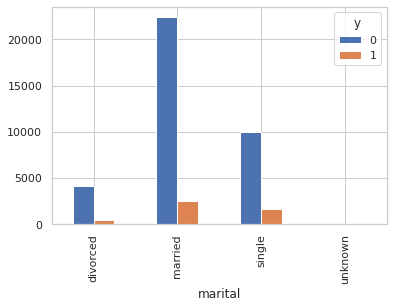

In [23]:
pd.crosstab(data.marital, data.y).plot(kind='bar')
plt.show()

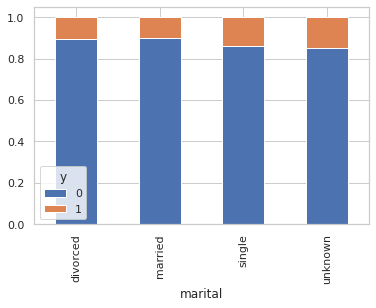

In [24]:
table = pd.crosstab(data.marital, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

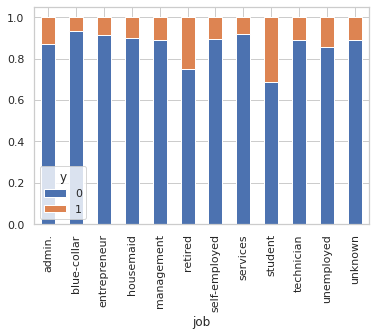

In [25]:
table = pd.crosstab(data.job, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

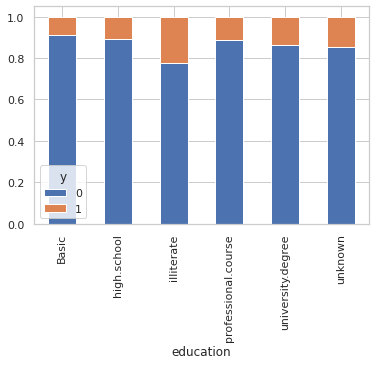

In [26]:
table = pd.crosstab(data.education, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

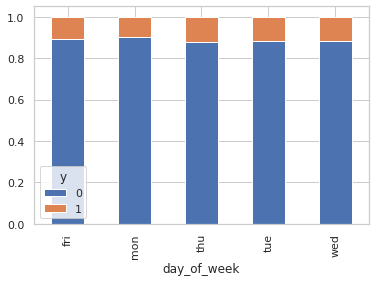

In [27]:
table = pd.crosstab(data.day_of_week, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

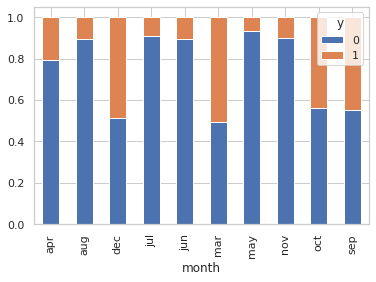

In [28]:
table = pd.crosstab(data.month, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

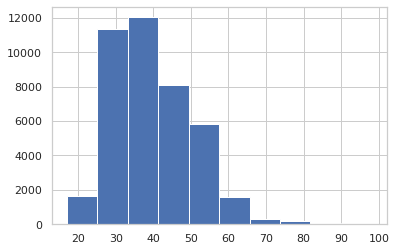

In [29]:
data.age.hist()
plt.show()

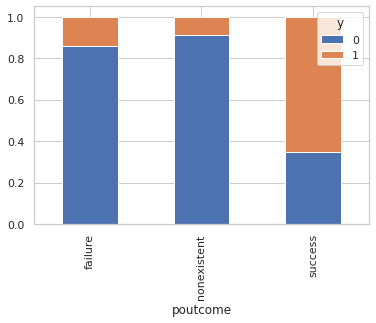

In [30]:
table = pd.crosstab(data.poutcome, data.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar',stacked=True)
plt.show()

In [31]:
#encoding categorical features into numeric(one hot encoding)

cat_var = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
for var in cat_var:
    cat_list= pd.get_dummies(data[var],prefix=var,drop_first=True)
    data_temp = pd.concat([data,cat_list], axis=1)
    data = data_temp

In [32]:
data.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,blue-collar,married,Basic,unknown,yes,no,cellular,aug,thu,210,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,technician,married,unknown,no,no,no,cellular,nov,fri,138,1,999,0,nonexistent,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,management,single,university.degree,no,yes,no,cellular,jun,thu,339,3,6,2,success,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,39,services,married,high.school,no,no,no,cellular,apr,fri,185,2,999,0,nonexistent,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,retired,married,Basic,no,yes,no,cellular,aug,fri,137,1,3,1,success,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [33]:
#columns to drop

cat_vars = ['job','marital','education','default','housing','loan','contact','month','day_of_week','poutcome']
data_vars=data.columns.values.tolist()
to_keep = [i for i in data_vars if i not in cat_vars]

In [34]:
data_final = data[to_keep]

In [35]:
data_final.columns.values

array(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp_var_rate',
       'cons_price_idx', 'cons_conf_idx', 'euribor3m', 'nr_employed', 'y',
       'job_blue-collar', 'job_entrepreneur', 'job_housemaid',
       'job_management', 'job_retired', 'job_self-employed',
       'job_services', 'job_student', 'job_technician', 'job_unemployed',
       'job_unknown', 'marital_married', 'marital_single',
       'marital_unknown', 'education_high.school', 'education_illiterate',
       'education_professional.course', 'education_university.degree',
       'education_unknown', 'default_unknown', 'default_yes',
       'housing_unknown', 'housing_yes', 'loan_unknown', 'loan_yes',
       'contact_telephone', 'month_aug', 'month_dec', 'month_jul',
       'month_jun', 'month_mar', 'month_may', 'month_nov', 'month_oct',
       'month_sep', 'day_of_week_mon', 'day_of_week_thu',
       'day_of_week_tue', 'day_of_week_wed', 'poutcome_nonexistent',
       'poutcome_success'], dtype=object)

In [36]:
data_final.head()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,y,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
0,44,210,1,999,0,1.4,93.444,-36.1,4.963,5228.1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1,0
1,53,138,1,999,0,-0.1,93.200,-42.0,4.021,5195.8,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,28,339,3,6,2,-1.7,94.055,-39.8,0.729,4991.6,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1
3,39,185,2,999,0,-1.8,93.075,-47.1,1.405,5099.1,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
4,55,137,1,3,1,-2.9,92.201,-31.4,0.869,5076.2,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [37]:
data_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 52 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   age                            41188 non-null  int64  
 1   duration                       41188 non-null  int64  
 2   campaign                       41188 non-null  int64  
 3   pdays                          41188 non-null  int64  
 4   previous                       41188 non-null  int64  
 5   emp_var_rate                   41188 non-null  float64
 6   cons_price_idx                 41188 non-null  float64
 7   cons_conf_idx                  41188 non-null  float64
 8   euribor3m                      41188 non-null  float64
 9   nr_employed                    41188 non-null  float64
 10  y                              41188 non-null  int64  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

In [38]:
X = data_final.loc[:, data_final.columns != 'y']
y = data_final.loc[:, data_final.columns == 'y']

In [39]:
X.tail()

,age,duration,campaign,pdays,previous,emp_var_rate,cons_price_idx,cons_conf_idx,euribor3m,nr_employed,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,marital_unknown,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_unknown,default_yes,housing_unknown,housing_yes,loan_unknown,loan_yes,contact_telephone,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_nonexistent,poutcome_success
41183,59,222,1,999,0,1.4,94.465,-41.8,4.866,5228.1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
41184,31,196,2,999,0,1.1,93.994,-36.4,4.860,5191.0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0
41185,42,62,3,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,1,0,1,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
41186,48,200,2,999,0,-3.4,92.431,-26.9,0.742,5017.5,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
41187,25,112,4,999,0,1.1,93.994,-36.4,4.859,5191.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0


In [40]:
y.tail()

,y
41183,0
41184,0
41185,0
41186,0
41187,0


In [41]:
#splitiing dataset into train and test

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3, random_state=0)

In [42]:
X_train.shape

(28831, 51)

In [43]:
X_test.shape

(12357, 51)

In [44]:
#over sampling the train data as it is imbalanced

os = SMOTE(random_state=0)

In [45]:
os_data_X, os_data_y=os.fit_sample(X_train, y_train)

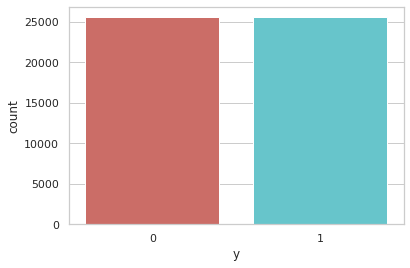

In [46]:
sns.countplot(x='y', data=os_data_y, palette='hls')
plt.show()

In [47]:
os_data_X.describe().transpose().style.background_gradient(cmap='BuGn')

,count,mean,std,min,25%,50%,75%,max
age,51134.000000,40.072398,11.461991,17.000000,31.000000,37.000000,47.000000,98.000000
duration,51134.000000,383.657938,352.846739,0.000000,144.000000,265.000000,528.000000,4918.000000
campaign,51134.000000,2.179020,2.269811,1.000000,1.000000,1.000000,2.000000,43.000000
pdays,51134.000000,889.383287,311.267949,0.000000,999.000000,999.000000,999.000000,999.000000
previous,51134.000000,0.245903,0.587619,0.000000,0.000000,0.000000,0.000000,7.000000
emp_var_rate,51134.000000,-0.499789,1.720985,-3.400000,-1.800000,-0.100000,1.400000,1.400000
cons_price_idx,51134.000000,93.476932,0.622482,92.201000,92.921930,93.444000,93.994000,94.767000
cons_conf_idx,51134.000000,-40.179396,5.227961,-50.800000,-42.700000,-41.502788,-36.400000,-26.900000
euribor3m,51134.000000,2.964787,1.887432,0.634000,1.236436,4.021000,4.958000,5.045000
nr_employed,51134.000000,5135.695606,86.671865,4963.600000,5076.200000,5191.000000,5228.100000,5228.100000


In [48]:
#pipeline for fitting required model with gridsearchcv for tunning hyperparameters

def algorithm_pipeline(X_train_data, X_test_data, y_train_data, y_test_data, 
                       model, param_grid, cv=10, scoring_fit='accuracy'):
    gs = GridSearchCV(
        estimator=model,
        param_grid=param_grid, 
        cv=cv, 
        scoring=scoring_fit,
        verbose=2
    )
    fitted_model = gs.fit(X_train_data, np.ravel(y_train_data))
    pred = fitted_model.predict(X_test_data)
    
    return fitted_model, pred

In [49]:
#selecting model and choosing range of hyperparameters

model = xgb.XGBClassifier()
param_grid = {
    'n_estimators': [200,250,300,350,400],
    'max_depth': [10,15,20],
    'learning_rate': [0.001,0.01,0.1]
}

model, pred = algorithm_pipeline(os_data_X, X_test, os_data_y, y_test, model,param_grid, cv=4)

print(model.best_score_)
print(model.best_params_)

Fitting 4 folds for each of 45 candidates, totalling 180 fits
[CV] learning_rate=0.001, max_depth=10, n_estimators=200 .............


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  learning_rate=0.001, max_depth=10, n_estimators=200, total=  12.5s
[CV] learning_rate=0.001, max_depth=10, n_estimators=200 .............


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:   12.5s remaining:    0.0s


[CV]  learning_rate=0.001, max_depth=10, n_estimators=200, total=  10.1s
[CV] learning_rate=0.001, max_depth=10, n_estimators=200 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200, total=  10.5s
[CV] learning_rate=0.001, max_depth=10, n_estimators=200 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=200, total=  10.4s
[CV] learning_rate=0.001, max_depth=10, n_estimators=250 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=250, total=  13.4s
[CV] learning_rate=0.001, max_depth=10, n_estimators=250 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=250, total=  22.6s
[CV] learning_rate=0.001, max_depth=10, n_estimators=250 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=250, total=  13.2s
[CV] learning_rate=0.001, max_depth=10, n_estimators=250 .............
[CV]  learning_rate=0.001, max_depth=10, n_estimators=250, total=  12.9s
[CV] learning_rate=0.001, max_depth=10, n_estimators=300 ......

[Parallel(n_jobs=1)]: Done 180 out of 180 | elapsed: 75.1min finished


0.9282486205058404
{'learning_rate': 0.01, 'max_depth': 15, 'n_estimators': 400}


# Feature selection

In [50]:
model = xgb.XGBClassifier(learning_rate=0.01,max_depth=15,n_estimators=400,random_state=0)

In [51]:
model.fit(os_data_X,np.ravel(os_data_y))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [52]:
importances = model.feature_importances_

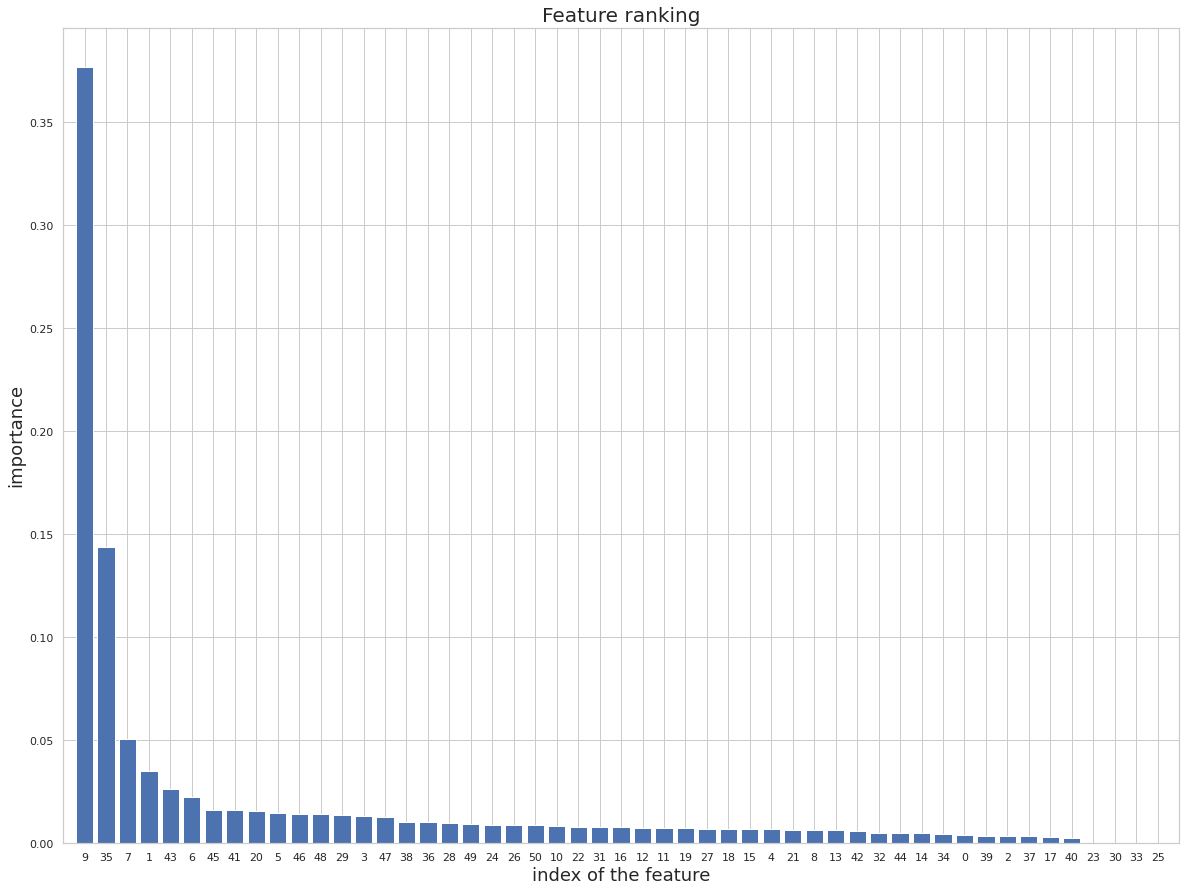

In [53]:
indices = np.argsort(importances)[::-1]
feature_names = os_data_X.columns    
f, ax = plt.subplots(figsize=(20, 15))
plt.title("Feature ranking", fontsize = 20)
plt.bar(range(os_data_X.shape[1]), importances[indices], color="b", align="center")
plt.xticks(range(os_data_X.shape[1]), indices) #feature_names, rotation='vertical')
plt.xlim([-1, os_data_X.shape[1]])
plt.ylabel("importance", fontsize = 18)
plt.xlabel("index of the feature", fontsize = 18)
plt.show()

In [54]:
temp = sorted(zip(map(lambda x: round(x, 4), model.feature_importances_), feature_names))

In [55]:
temp

[(0.0, 'default_yes'),
 (0.0, 'education_illiterate'),
 (0.0, 'loan_unknown'),
 (0.0, 'marital_unknown'),
 (0.0026, 'month_mar'),
 (0.0033, 'job_student'),
 (0.0034, 'month_dec'),
 (0.0036, 'campaign'),
 (0.0036, 'month_jun'),
 (0.004, 'age'),
 (0.0046, 'loan_yes'),
 (0.0049, 'job_retired'),
 (0.0049, 'month_sep'),
 (0.0052, 'housing_yes'),
 (0.0061, 'month_nov'),
 (0.0063, 'job_management'),
 (0.0065, 'euribor3m'),
 (0.0066, 'marital_married'),
 (0.0067, 'previous'),
 (0.007, 'job_self-employed'),
 (0.007, 'job_technician'),
 (0.0071, 'education_university.degree'),
 (0.0073, 'job_entrepreneur'),
 (0.0073, 'job_unemployed'),
 (0.0074, 'job_housemaid'),
 (0.0077, 'job_services'),
 (0.0078, 'housing_unknown'),
 (0.0079, 'marital_single'),
 (0.0085, 'job_blue-collar'),
 (0.0087, 'poutcome_success'),
 (0.0089, 'education_professional.course'),
 (0.009, 'education_high.school'),
 (0.0094, 'poutcome_nonexistent'),
 (0.0099, 'education_unknown'),
 (0.0102, 'month_aug'),
 (0.0104, 'month_jul'

In [56]:
xgb_sel_cols = [i[1] for i in temp if i[0]> 0.005]
logreg_sel_cols = [i[1] for i in temp if i[0]> 0.0095]

# Logistic regression

In [57]:
X_train_sel = os_data_X[logreg_sel_cols]
y_train_sel = os_data_y.copy()
X_test_sel = X_test[logreg_sel_cols]

len(X_train_sel.columns)

18

In [58]:
logit_model = sm.Logit(y_train_sel,X_train_sel)

In [59]:
result = logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.248802
         Iterations 8
                          Results: Logit
Model:               Logit            Pseudo R-squared: 0.641     
Dependent Variable:  y                AIC:              25480.4435
Date:                2020-06-14 22:51 BIC:              25639.6032
No. Observations:    51134            Log-Likelihood:   -12722.   
Df Model:            17               LL-Null:          -35443.   
Df Residuals:        51116            LLR p-value:      0.0000    
Converged:           1.0000           Scale:            1.0000    
No. Iterations:      8.0000                                       
------------------------------------------------------------------
                   Coef.  Std.Err.    z     P>|z|   [0.025  0.975]
------------------------------------------------------------------
education_unknown -1.1753   0.1125 -10.4473 0.0000 -1.3958 -0.9548
month_aug         -0.9990   0.0629 -15.8885 0.0000 -1

In [60]:
#fitting the model using K-fold crossvalidation

kf = KFold(n_splits=5,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(X_train_sel):    
    data_train, target_train = X_train_sel.iloc[train_index], y_train_sel.iloc[train_index]
    data_test, target_test = X_train_sel.iloc[test_index], y_train_sel.iloc[test_index]
    
    clf = LogisticRegression(max_iter=5000)
    clf.fit(data_train,np.ravel(target_train))
    
    preds = clf.predict(data_test)
    
    accuracy = accuracy_score(target_test,preds)
    
    accuracies.append(accuracy)

In [61]:
print(np.mean(accuracies))
print(np.std(accuracies))

0.9055226946782513
0.0024851662053253913


In [62]:
#final model to test with test data

final_model = LogisticRegression(max_iter=3000)

In [63]:
X_train_sel.shape

(51134, 18)

In [64]:
final_model.fit(X_train_sel,np.ravel(y_train_sel))

LogisticRegression(max_iter=3000)

In [65]:
y_pred = final_model.predict(X_test_sel)

In [66]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(final_model.score(X_test_sel, y_test)))

Accuracy of logistic regression classifier on test set: 0.88


In [67]:
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[9894 1087]
 [ 430  946]]


In [68]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.96      0.90      0.93     10981
           1       0.47      0.69      0.56      1376

    accuracy                           0.88     12357
   macro avg       0.71      0.79      0.74     12357
weighted avg       0.90      0.88      0.89     12357



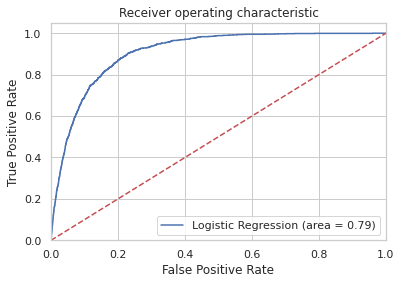

In [69]:
logit_roc_auc = roc_auc_score(y_test, final_model.predict(X_test_sel))
fpr, tpr, thresholds = roc_curve(y_test, final_model.predict_proba(X_test_sel)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

# XGBoost

In [70]:
X_train_sel = os_data_X[xgb_sel_cols]
y_train_sel = os_data_y.copy()
X_test_sel = X_test[xgb_sel_cols]

len(X_train_sel.columns)

38

In [71]:
#fitting the model using K-fold crossvalidation

kf = KFold(n_splits=5,random_state=42,shuffle=True)
accuracies = []
for train_index, test_index in kf.split(X_train_sel):    
    data_train, target_train = X_train_sel.iloc[train_index], y_train_sel.iloc[train_index]
    data_test, target_test = X_train_sel.iloc[test_index], y_train_sel.iloc[test_index]
    
    clf = xgb.XGBClassifier(learning_rate=0.01,n_estimators=350,max_depth=15)
    clf.fit(data_train,np.ravel(target_train))
    
    preds = clf.predict(data_test)
    
    accuracy = accuracy_score(target_test,preds)
    
    accuracies.append(accuracy)

In [72]:
print(np.mean(accuracies))
print(np.std(accuracies))

0.947334446075265
0.0007127506463668614


In [73]:
#xgb model with hyperparametrs choosen from tunning

xgb_model = xgb.XGBClassifier(learning_rate=0.01,n_estimators=350,max_depth=15)

In [74]:
xgb_model.fit(X_train_sel,np.ravel(y_train_sel))

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=350, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [75]:
pred = xgb_model.predict(X_test_sel)

In [76]:
print('Accuracy of logistic regression classifier on test set: {:.2f}'.format(xgb_model.score(X_test_sel, y_test)))

Accuracy of logistic regression classifier on test set: 0.90


In [77]:
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

           0       0.95      0.94      0.95     10981
           1       0.57      0.63      0.60      1376

    accuracy                           0.90     12357
   macro avg       0.76      0.78      0.77     12357
weighted avg       0.91      0.90      0.91     12357



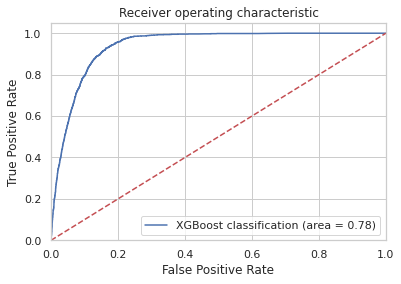

In [78]:
logit_roc_auc = roc_auc_score(y_test, xgb_model.predict(X_test_sel))
fpr, tpr, thresholds = roc_curve(y_test, xgb_model.predict_proba(X_test_sel)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='XGBoost classification (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()